In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("TvMarketing.csv")
df


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [2]:
#1. Import dataset and display first 5 rows
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
#2. Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [4]:
#3. Check the shape of the Data Frame (rows, columns)
df.shape

(200, 2)

In [5]:
#4. Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


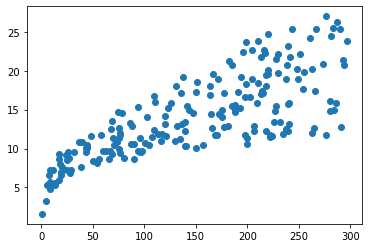

In [7]:
#5. Visualize the relationship between the features and the dependent variable using scatterplots
plt.scatter(x=df['TV'],y=df["Sales"])

plt.show()

In [8]:
#6. Prepare X (feature variables) and y (response variable)
x=df.drop(columns="Sales")
y=df['Sales']

In [9]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,y_train.shape


((140, 1), (140,))

In [10]:
#8. Print the shape of train data and test data
x_train.shape,y_train.shape

((140, 1), (140,))

In [21]:
#9. Perform Linear Regression (on train data) without using any library and print the coefficients values
import numpy as np
df=df.apply(pd.to_numeric,errors='coerce')
x = df[['TV']].values  # Feature
y = df[['Sales']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train=x_train.astype(float)
y_train=y_train.astype(float)
x_mean=np.mean(x_train)
y_mean=np.mean(y_train)
numerator=np.sum((x_train-x_mean) * (y_train-y_mean))
denaminator=np.sum((x_train-x_mean)**2)
coef=numerator/denaminator
intercept=y_mean-coef*x_train
intercept


array([[ 1.30340471],
       [ 5.91634024],
       [ 9.257702  ],
       [13.39263717],
       [ 1.00639478],
       [13.5968315 ],
       [ 0.87181215],
       [13.62931696],
       [ 8.26457503],
       [13.30910312],
       [ 9.83779952],
       [10.77523713],
       [ 5.75391294],
       [ 6.28296188],
       [ 8.66368213],
       [ 4.77006753],
       [ 7.86546793],
       [ 5.91634024],
       [ 4.17604766],
       [ 3.28037708],
       [13.69892866],
       [ 8.9050027 ],
       [10.33436301],
       [ 5.62861187],
       [10.9933538 ],
       [ 5.53115549],
       [10.51999421],
       [ 2.11090047],
       [12.66403467],
       [ 2.37078416],
       [13.88455987],
       [ 5.50795158],
       [ 0.74187031],
       [ 2.17123061],
       [ 4.53338774],
       [ 7.54989488],
       [ 8.38523532],
       [11.82869423],
       [ 3.35462957],
       [ 7.93972042],
       [ 6.10661223],
       [ 9.98630449],
       [ 4.26422249],
       [ 7.98612822],
       [ 2.64459019],
       [10

In [24]:
#10.Create the model using the calculated coefficients and make predictions on the testing set
y_pred=intercept+coef*x_train
y_pred

array([[14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14.49714286],
       [14

In [26]:
#11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
print(model.coef_)
print(model.intercept_)

[[0.0464078]]
[7.23945983]


In [27]:
#12.Print the intercept and coefficients
print(model.coef_)
print(model.intercept_)

[[0.0464078]]
[7.23945983]


In [28]:
##13.Make predictions on the testing set - y_pred
y_pred=model.predict(x_test)
y_pred

array([[14.81785392],
       [16.30754437],
       [20.83230507],
       [ 7.78243112],
       [17.46309864],
       [10.72468577],
       [17.30067133],
       [ 9.55984994],
       [17.56055502],
       [15.36546598],
       [ 8.7013056 ],
       [ 9.84757831],
       [18.12208943],
       [ 7.49006196],
       [13.71334823],
       [15.13806775],
       [ 7.57823679],
       [16.40964153],
       [10.73396733],
       [18.25667206],
       [17.89005042],
       [10.38590882],
       [ 9.00295631],
       [18.88317738],
       [10.44159818],
       [ 9.72227724],
       [17.14752559],
       [13.70406667],
       [11.28622018],
       [ 7.62928537],
       [16.5117387 ],
       [10.45087974],
       [16.46997167],
       [ 8.02375169],
       [20.26612989],
       [18.2937983 ],
       [ 9.48095667],
       [19.94127527],
       [12.67845424],
       [ 8.51567439],
       [12.62276488],
       [15.45364081],
       [ 9.2396361 ],
       [10.1306659 ],
       [17.63480751],
       [ 9

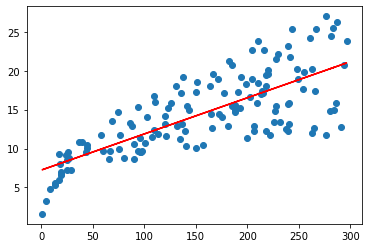

In [31]:
#14.Plot train data and the model
y_train_pred=model.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,color='red')
plt.show()

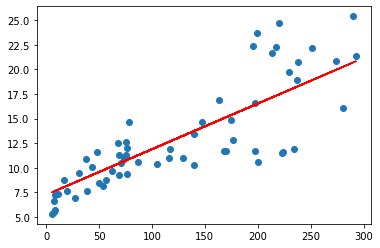

In [32]:
#15.Plot test data and the model
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.show()

In [34]:
#16.Print Mean Squared Error and R Squared Value
mse=np.mean((y_test-y_pred)**2)
print(mse)
y_mean=np.mean(y_test)
numerator=sum((y_test-y_pred)**2)
denaminator=sum((y_test-y_mean)**2)
r2=1-numerator/denaminator
r2

8.970991242413614


array([0.67144772])

In [35]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
n=len(y_test)
p=1
adj=1-((1-r2)*(n-1)/(n-p-1))
adj

array([0.66578303])